# Visualisation des filtres de convolution

## Chargement des données `CIFAR10`

In [ ]:
import torch
import torchvision
from torch.utils.data import TensorDataset, DataLoader

dataset_class = torchvision.datasets.CIFAR10

batch_size = 3
x, y = next(iter(DataLoader(
    dataset_class(root='./', download=True,
                   transform=torchvision.transforms.Compose([
                       torchvision.transforms.ToTensor()])),
                       batch_size=batch_size, shuffle=True)))


100%|██████████| 170M/170M [00:01<00:00, 96.1MB/s]


Extracting ./cifar-10-python.tar.gz to ./


## Affichage d'un groupe d'images

shape x torch.Size([3, 3, 32, 32])


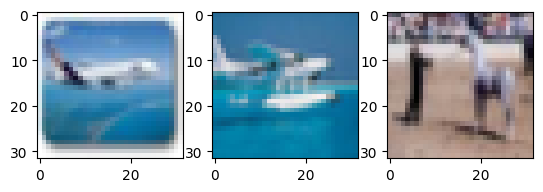

In [ ]:
import matplotlib.pyplot as plt

def show_imgs(x, channel_list):
  plt.figure()
  nb_img = len(x)
  for k in range(nb_img):
    plt.subplot(1, nb_img, k + 1)
    plt.imshow(x[k, channel_list].permute(1, 2, 0).squeeze().detach())

print('shape x', x.shape)
show_imgs(x, [0, 1, 2])

## Fitlres de convolution

shape x1 torch.Size([3, 4, 15, 15])
shape x2 torch.Size([3, 4, 7, 7])
shape x3 torch.Size([3, 196])


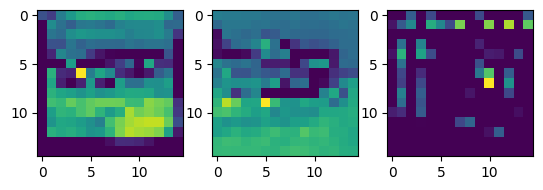

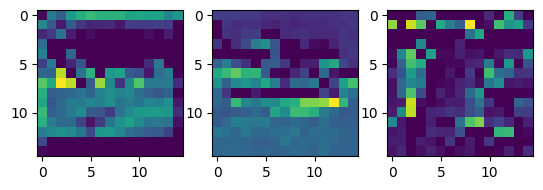

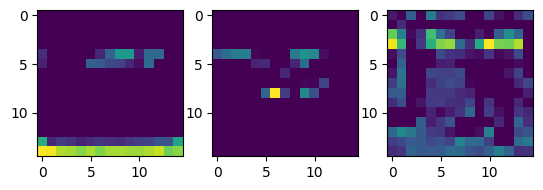

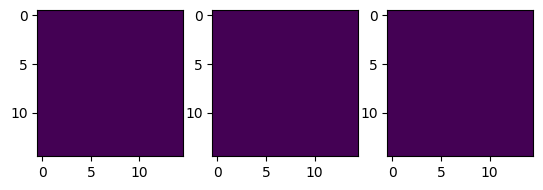

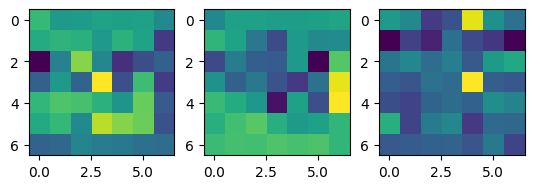

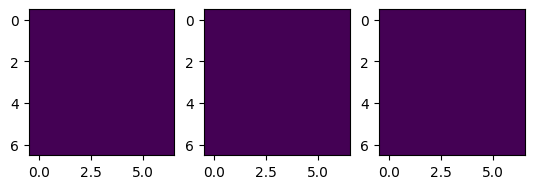

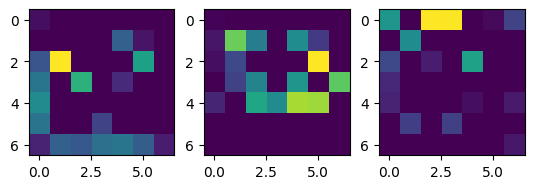

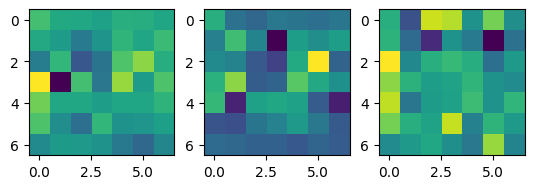

In [ ]:
nb_c = 4
conv1 = torch.nn.Conv2d(in_channels=3, out_channels=nb_c, kernel_size=4, stride=2)
conv2 = torch.nn.Conv2d(in_channels=nb_c, out_channels=nb_c, kernel_size=3, stride=2)
non_lin = torch.nn.ReLU()

x1 = non_lin(conv1(x))
print('shape x1', x1.shape)

for c in range(nb_c):
  show_imgs(x1, [c])

x2 = non_lin(conv2(x1))
print('shape x2', x2.shape)

for c in range(nb_c):
  show_imgs(x2, [c])

x3 = x2.flatten(start_dim=1)
print('shape x3', x3.shape)


In [ ]:
x3 = x2.flatten(start_dim=1)
print('shape x3', x3.shape)


shape x3 torch.Size([3, 196])


In [ ]:
print(x3)

tensor([[0.0681, 0.0589, 0.0594, 0.0614, 0.0607, 0.0611, 0.0542, 0.0640, 0.0667,
         0.0655, 0.0587, 0.0661, 0.0613, 0.0326, 0.0204, 0.0518, 0.0784, 0.0533,
         0.0299, 0.0374, 0.0425, 0.0423, 0.0588, 0.0431, 0.0914, 0.0378, 0.0695,
         0.0331, 0.0673, 0.0717, 0.0708, 0.0660, 0.0571, 0.0748, 0.0409, 0.0637,
         0.0678, 0.0543, 0.0842, 0.0781, 0.0756, 0.0382, 0.0429, 0.0443, 0.0526,
         0.0505, 0.0492, 0.0465, 0.0459, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0018,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0144, 0.0

# Exercice

Entraîner un réseau de neurones à convolution sur la tâche de classification multi-classes suivante

In [ ]:
import torch
import torchvision
from torch.utils.data import TensorDataset, DataLoader

dataset_loader = torchvision.datasets.CIFAR10

batch_size = 1000
data_x, data_y = next(iter(DataLoader(
    dataset_loader(root='./', download=True,
                   transform=torchvision.transforms.Compose([
                       torchvision.transforms.ToTensor()])),
                       batch_size=batch_size, shuffle=True)))

train_dataset = TensorDataset(data_x, data_y)

Files already downloaded and verified


In [ ]:
data_x.shape

torch.Size([1000, 3, 32, 32])

In [ ]:
import torch.nn as nn

# Modèle prédictif
class CNN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels = 32, kernel_size = 3, stride = 2, padding = 1)
    self.conv2 = nn.Conv2d(32,64, kernel_size = 3, stride = 2 , padding =1)

    self.fc1 = nn.Linear(64*8*8, 128)
    self.fc2 = nn.Linear(128, 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.relu(self.conv2(x))
    x = x.view(x.size(0), -1)
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
# code qui parcours le jeu de données par bouts de taille 30
taille_minibatch = 30
train_data_iter = DataLoader(train_dataset, shuffle=True, drop_last=True,
                             batch_size=taille_minibatch)
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

with torch.no_grad():
    predictions = model(data_x).argmax(dim=1)
    nb_erreurs = (predictions != data_y.view(-1)).sum().item()
    print("Nombre de mauvaises classifications:", nb_erreurs)

for epoch in range(100):
  for data, train in train_data_iter:  # parcours de la base de données train_dataset par bouts de taille 32
    # Apprentissage du modèle par descente de gradien
      optimizer.zero_grad()
      outputs = model(data)
      loss = criterion(outputs, train.view(-1))
      loss.backward()
      optimizer.step()

with torch.no_grad():
    predictions = model(data_x).argmax(dim=1)
    nb_erreurs = (predictions != data_y.view(-1)).sum().item()
    print("Nombre de mauvaises classifications:", nb_erreurs)


Nombre de mauvaises classifications: 898
Nombre de mauvaises classifications: 0
